In [1]:
import pandas as pd
import os
from comut import comut

from comut import fileparsers


In [2]:

itens = os.listdir('.')
maf_files = [item for item in itens if item.endswith('.maf')]
print(maf_files)

relacao_id_ad = pd.read_csv('Id_Ad.csv', sep=';')
relacao_id_ad['ID']=relacao_id_ad['Codigo'].apply(lambda x: x.split('-')[0])
relacao_id_ad.drop(columns='Codigo', inplace=True)
#print(relacao_id_ad)

mafzao =  pd.DataFrame()
#mafzao_sem_variant = pd.DataFrame()
#mafzao_sem_variant_dbscan = pd.DataFrame()

for file in maf_files:
    df = pd.read_csv(f'{file}', sep='\t')
    df['ID'] = file.split('-')[0]
    #print(df)
    mafzao = pd.concat([mafzao, df], ignore_index = True)
    
mafzao = mafzao.merge(relacao_id_ad, how = 'left', on='ID')
mafzao_sem_variant = mafzao[~mafzao['Variant_Classification'].isin(['intron_variant', 'synonymous_variant', '3_prime_UTR_variant'])]    
mafzao_sem_variant_dbscan = mafzao_sem_variant[mafzao_sem_variant['dbSNP_RS'].isin(['.'])]
mafzao_sem_variant_dbscan_Hugo_com_ponto = mafzao_sem_variant_dbscan[~mafzao_sem_variant_dbscan['Hugo_Symbol'].isin(['.'])]
mafzao_limpo = mafzao_sem_variant_dbscan_Hugo_com_ponto[["Hugo_Symbol", "Chromosome", "Start_Position", "End_Position", "Reference_Allele","Variant_Classification", "Variant_Type", "Tumor_Seq_Allele2","Tumor_Sample_Barcode",'AD']]

mafzao.to_csv('mafzao.maf', sep='\t', index=False)
mafzao_sem_variant.to_csv('mafzao_sem_variant.maf', sep=';', index=False)
mafzao_sem_variant_dbscan.to_csv('mafzao_sem_variant_dbscan.maf', sep=';', index=False)
mafzao_sem_variant_dbscan_Hugo_com_ponto.to_csv('mafzao_sem_variant_dbscan_Hugo_com_ponto.maf', sep='\t', index=False)
mafzao_limpo.to_csv('mafzao_limpo.maf', sep='\t', index=False)

print(mafzao_sem_variant_dbscan)

print(f'Mafzao --> {len(mafzao)}')
print(f'Mafzao Variant--> {len(mafzao_sem_variant)}')
print(f'Mafzao Variant e DbScan --> {len(mafzao_sem_variant_dbscan)}')
print(f'Mafzao Variant e DbScan e Hugo sem ponto --> {len(mafzao_sem_variant_dbscan_Hugo_com_ponto)}')

maf_pronto_comut = mafzao_limpo[['AD', 'Hugo_Symbol','Variant_Classification']]
maf_pronto_comut.rename(columns={'AD':'sample', 'Hugo_Symbol': 'category', 'Variant_Classification': 'value'}, inplace=True)
print(maf_pronto_comut)
toy_comut = comut.CoMut()
#data = pd.read_csv('tutorial_data/tutorial_mutation_data.tsv', sep = '\t')

['mafzao_limpo.maf', 'mafzao_sem_variant.maf', 'mafzao_sem_variant_dbscan_Hugo_com_ponto.maf', 'mafzao.maf', 'mafzao_sem_variant_dbscan.maf']


KeyError: "['AD'] not in index"

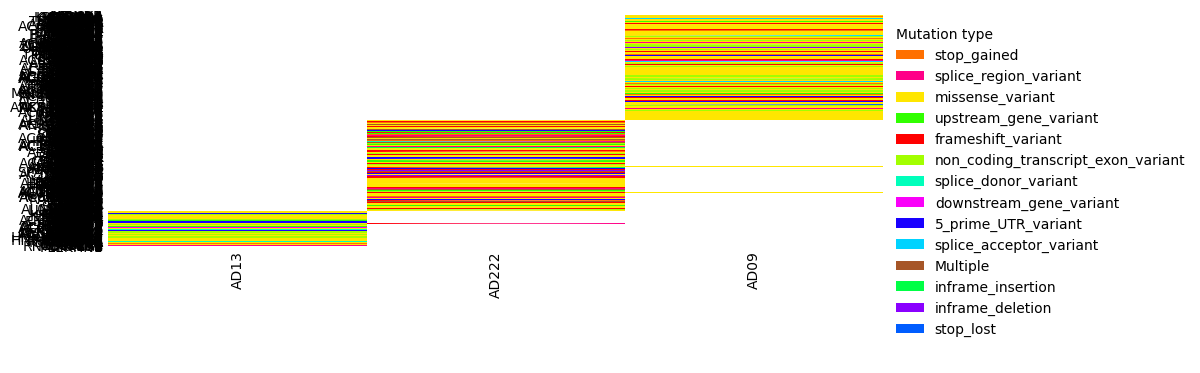

In [ ]:
toy_comut = comut.CoMut()
toy_comut.add_categorical_data(maf_pronto_comut, name = 'Mutation type')
toy_comut.plot_comut(figsize = (10,3))
toy_comut.add_unified_legend()
